In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import gudhi
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from Persistent_Homology_Ivanov import PHI
from ripser import ripser
from persim import plot_diagrams
from ripser import Rips
import math

In [2]:
def find_holes(d_matrix, is_d_matrix=False):
    # ======= bullshit =======
    #point_cloud= np.array(d_matrix)
    #result = ripser(d_matrix, coeff=17, do_cocycles=True, n_perm=7, distance_matrix=False)
    #diagrams = result['dgms']
    #plot_diagrams(diagrams, show = True)
    #cocycles = result['cocycles']
    #hole=cocycles[1]
    #print(cocycles)
    #print(hole)
    
    
    
    compl = PHI(d_matrix)
    compl.text_bow_spec()
    compl.sifts()
    compl.simplex_tree.compute_persistence(min_persistence=0)
    diagrams = [np.array(compl.simplex_tree.persistence_intervals_in_dimension(x)) for x in range(2)]
    # [1] sorted differently than initial ones at dim=1, be advised future me: 
    # [[11.        , 12.04159451],[ 6.3245554 ,  6.70820379]] -> 
    # -> [[ 6.32455532,  6.70820393],[11.        , 12.04159458]]
    # otherwise babysteps win
    
    # [2] compute cocycles
    
    
    dgms = diagrams[1] # [3] sorted differently, refer to [1]
    dgm = [diagrams[1]] # [4] possibly deprecated, sorted differently, refer to [1]
    l = dgms[:, 1] - dgms[:, 0]
    
    
    # [5] if anything breaks at this point between [2] and [5] 
    # in higher dimentions, revert to the original code 
    # that otherwise is an extreme pile of bullshit:
    #new_dgm=[]
    #new_dgms=new_diagrams[1]
    #new_dgm.append(new_dgms)
    #for new_dgm in new_dgm:
    #    new_l = new_dgm[:, 1] - new_dgm[:, 0]
    
    # [6] work-in-progress to eliminate extra lines, but otherwise
    # we order the intervals by decreasing length
    # by the way l is kinda the lifespans of holes
    index=sorted(range(len(l)), key=lambda k: l[k])
    index=index[::-1]
    l=np.sort(l)
    l=l[::-1]
    
    # [7] compute persistent entropy HL
    
    
    
    #3. Compute the persistent entropy HL
    if all(l > 0):
        L = np.sum(l)
        p = l / L
        Hmax = -np.sum(p * np.log(p))#HL
    #4. Compute the persistent entropy HL'(i)
    #4.1 Compute l’k
    #4.1.1 Compute e^(Hi)
    Hi=[]
    for a in range(len(l)):
        b=0
        temp_Hi=0
        while b<=a:
            temp_Hi=temp_Hi+((-l[b]/L)* np.log(l[b]/L))
            b=b+1
        Hi.append(temp_Hi)
    EHi=[]
    for item in Hi:
        EHi.append(math.exp(item))
    #4.1.2 Compute Si
    lk=[]
    for a in range(len(l)):
        Sum=0
        b=0
        while b<=a:
            Sum=Sum+l[b]
            b=b+1
        lk.append(Sum/EHi[a])#l'k
        H2i=-(lk/L)* np.log(lk/L) #H'i
    #Compute Hrel(i)
    Hrel=[] #Hrel(i)
    feature=[]
    for a in range(len(l)):
        Hrel.append((H2i[a]-H2i[a-1])/(np.log(len(l))-Hmax))
        compare=((a-1)/len(l))
        if Hrel[a]>compare:
            feature.append(1)
        else :
            feature.append(0)
    feature=np.array(feature)
    print(diagrams, index, feature)

anec = '''Dean, to the physics department. "Why do I always have to give you guys so much money, for laboratories and expensive equipment and stuff. Why couldn't you be like the math department - all they need is money for pencils, paper and waste-paper baskets. Or even better, like the philosophy department. All they need are pencils and paper."'''

find_holes(anec)

[array([[ 0., inf]]), array([[2.        , 2.23606798],
       [2.        , 2.23606798],
       [2.        , 2.23606798],
       [1.73205081, 2.23606798],
       [1.41421356, 2.23606798],
       [2.        , 2.23606798],
       [1.73205081, 2.23606798],
       [1.41421356, 2.23606798],
       [0.        , 2.44948974]])] [8, 7, 4, 6, 3, 5, 2, 1, 0] [1 1 0 0 0 0 0 0 0]


In [6]:
data = np.array([[1, 1, 0], [7, 0, 0], [4, 6, 0], [9, 6, 0], [0, 14, 0], [2, 19, 0], [9, 17, 0]])

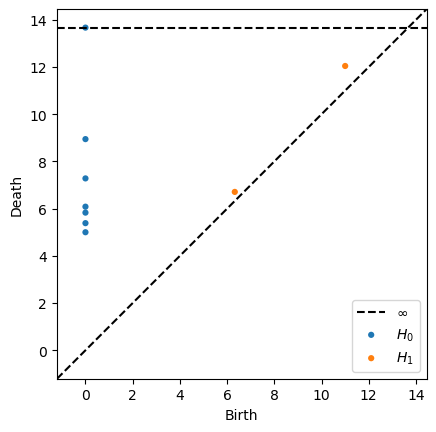

[[  0.           0.        ]
 [436.62777778 432.87777778]]


([9, 7, 4], [6, 0, 6], [0, 0, 0])

In [114]:
def find_holes2(d_matrix):
    point_cloud= np.array(d_matrix)
    result = ripser(d_matrix, coeff=17, do_cocycles=True, n_perm=7, distance_matrix=False)
    diagrams = result['dgms']
    plot_diagrams(diagrams, show = True)
    cocycles = result['cocycles']
    hole=cocycles[1]
    dgm=[]
    diagrams = result['dgms']
    dgms=diagrams[1]
    dgm.append(dgms)
    for dgm in dgm:
        l = dgm[:, 1] - dgm[:, 0]
    #2. Order the intervals by decreasing length
    index=sorted(range(len(l)), key=lambda k: l[k])
    index=index[::-1]
    l=np.sort(l)
    l=l[::-1]
    #3. Compute the persistent entropy HL
    if all(l > 0):
        L = np.sum(l)
        p = l / L
        Hmax = -np.sum(p * np.log(p))#HL
    #4. Compute the persistent entropy HL'(i)
    #4.1 Compute l’k
    #4.1.1 Compute e^(Hi)
    Hi=[]
    for a in range(len(l)):
        b=0
        temp_Hi=0
        while b<=a:
            temp_Hi=temp_Hi+((-l[b]/L)* np.log(l[b]/L))
            b=b+1
        Hi.append(temp_Hi)
    EHi=[]
    for item in Hi:
        EHi.append(math.exp(item))
    #4.1.2 Compute Si
    lk=[]
    for a in range(len(l)):
        Sum=0
        b=0
        while b<=a:
            Sum=Sum+l[b]
            b=b+1
        lk.append(Sum/EHi[a])#l'k
        H2i=-(lk/L)* np.log(lk/L) #H'i
    #Compute Hrel(i)
    Hrel=[] #Hrel(i)
    feature=[]
    for a in range(len(l)):
        Hrel.append((H2i[a]-H2i[a-1])/(np.log(len(l))-Hmax))
        compare=((a-1)/len(l))
        if Hrel[a]>compare:
            feature.append(1)
        else :
            feature.append(0)
    feature=np.array(feature)

    
    x_hole=[]
    y_hole=[]
    z_hole=[]
    index=np.array(index)
    Find_hole=np.empty((len(feature), 2))
    print(Find_hole)
    vertix_all_hole=[]
    for a in range(len(feature)):
        Find_hole[a,0]=feature[a]
        Find_hole[a,1]=index[a]
    hole_feature=[]
    for a in range(len(Find_hole)):
        x_hole_feature=[]
        y_hole_feature=[]
        z_hole_feature=[]
        if Find_hole[a,0]==1:
            position=int(Find_hole[a,1])
            hole_feature.append(position)
            temp=hole[position]
            vertix_hole=[]
            for b in temp:
                for c in b:
                    if all(vertix_hole!=c):
                        vertix_hole.append(c)
                    if all(vertix_all_hole!=c):
                        vertix_all_hole.append(c)
        # vertix_all_hole=Union(vertix_all_hole,vertix_hole)
        for d in range(len(vertix_hole)):
            vertix_index=vertix_hole[d]
            x_hole_feature.append(point_cloud[vertix_index,0])
            y_hole_feature.append(point_cloud[vertix_index,1])
            z_hole_feature.append(point_cloud[vertix_index,2])
    return(x_hole_feature, y_hole_feature, z_hole_feature)

find_holes2(фтус)

In [13]:
def find_holes3(d_matrix):
    point_cloud= np.array(d_matrix)
    result = ripser(d_matrix, coeff=3, do_cocycles=True, distance_matrix=True)
    diagrams = result['dgms']
    #plot_diagrams(diagrams, show = True)
    cocycles = result['cocycles']
    holes=cocycles[1]
    dgm=[]
    diagrams = result['dgms']
    dgms=diagrams[1]
    dgm.append(dgms)
    for dgm in tqdm(dgm):
        l = dgm[:, 1] - dgm[:, 0]
    #2. Order the intervals by decreasing length
    index=sorted(range(len(l)), key=lambda k: l[k])
    index=index[::-1]
    l=np.sort(l)
    l=l[::-1]
    #3. Compute the persistent entropy HL
    if all(l > 0):
        L = np.sum(l)
        p = l / L
        Hmax = -np.sum(p * np.log(p))#HL
    #4. Compute the persistent entropy HL'(i)
    #4.1 Compute l’k
    #4.1.1 Compute e^(Hi)
    Hi=[]
    for a in tqdm(range(len(l))):
        b=0
        temp_Hi=0
        while b<=a:
            temp_Hi=temp_Hi+((-l[b]/L)* np.log(l[b]/L))
            b=b+1
        Hi.append(temp_Hi)
    EHi=[]
    for item in Hi:
        EHi.append(math.exp(item))
    #4.1.2 Compute Si
    lk=[]
    for a in range(len(l)):
        Sum=0
        b=0
        while b<=a:
            Sum=Sum+l[b]
            b=b+1
        lk.append(Sum/EHi[a])#l'k
        H2i=-(lk/L)* np.log(lk/L) #H'i
    #Compute Hrel(i)
    Hrel=[] #Hrel(i)
    feature=[]
    for a in tqdm(range(len(l))):
        Hrel.append((H2i[a]-H2i[a-1])/(np.log(len(l))-Hmax))
        compare=((a-1)/len(l))
        if Hrel[a]>compare:
            feature.append(1)
        else :
            feature.append(0)
    feature = np.array(feature)
    index = np.array(index)
    #print(diagrams[1], index, feature)
    #return cocycles[1]
    holes_sig = np.delete(index, np.where(feature == 0))
    cocycles_hs = [holes[i].flatten().tolist() for i in holes_sig] # cocycles of significant holes
    all_in_holes = set([j for i in cocycles_hs for j in i]) # all phrases in holes ===== change ====
    return all_in_holes
    
anec = '''Dean, to the physics department. "Why do I always have to give you guys so much money, for laboratories and expensive equipment and stuff. Why couldn't you be like the math department - all they need is money for pencils, paper and waste-paper baskets. Or even better, like the philosophy department. All they need are pencils and paper."'''
new_PHI = PHI(jokes_full)
new_PHI.text_bow_spec(word_count=5)
d_matrix, distance_max = new_PHI.dist_calc(False)
for i in range(len(new_PHI.bow)-1):
    d_matrix[i+1][i] = 0
need = find_holes3(d_matrix)
print([new_PHI.corpus[i] for i in need])
# print([np.delete(new_PHI.cv.get_feature_names(), np.where(new_PHI.bow[i] == 0)) for i in need])

100%|██████████| 11/11 [00:00<?, ?it/s]

['взросление. Парень уходит из родительского', 'дома, успешно преодолевает жизненные этапы', 'в новостях… а ты у', '- У меня на руках', '– А это кто, молодые', '- В ночь с двадцать', '- Это понятно, а месяца', '— Нда. И это вы', '- Если б знала, не', '- Ты чего не женишься', '- И не говори! Да', '- Это ты с чего?', '- Да и в Галактике,', '- А это, Тань, последние', 'я в себя не верить.', '- А на той я', '— Постойте! А почему не', '- Что Вы не предупредили,', 'у вас с Софочкой не', '- С чего Вы это', 'и не глядя в монитор.', '- А я и работаю.', '- Я люблю грудь и', '- Скажите, а в запасниках', '- А на лицо насрать?', 'У меня ощущение, что в', '- у меня в голове', '- Я СОЛДАТ! Я сам', 'и с женщиной лучше не', '- Ты не знаешь как', '-Да , и каким ?', 'Да у вас не магазин,', '- Фима, а на чём', '- А на чём бы', '- Э-э-э... Я забыла, как', 'механизма не в одиночку, а', '- Сахар - это наркотик.', '- Не возьму! Я с', 'Люди - как музыка. Не', '- О Боже! И что', '- Обратился к лудильщику -', 'в

In [3]:
df = pd.read_csv("C:\\Users\\ivano\\github_projects\\He_who_laughs_last\\Anecdotes data\\jokes.csv")

In [7]:
jokes_full = ''
for i in df['0'].values[:200].flatten():
    jokes_full += ' ' + i.replace('\r', ' ').replace('\n', ' ') + ' '

In [8]:
jokes_full

' Колобок - это сказка про взросление. Парень уходит из родительского дома, успешно преодолевает жизненные этапы (социализация — заяц, работа — волк, бытовые трудности — медведь), а потом встречает женщину, которая обманом завлекает его и уничтожает как личность.  Нам всё-таки удалось распространить свою идеологию и менталитет на Запад. Теперь и там боятся квитанций за ЖКХ.  Fоrbеs оценил состояние российских миллиардеров как предынфарктное.  Есть свидетельство о рождении. Есть свидетельство о смерти. Где свидетельство о жизни?  © Михаил Жванецкий  Пожарные оперативно потушили здание налоговой, но только на 13%.  Как грамотно написать письмо в саппорт?  — Уважаемые господа! Уже много лет я являюсь Вашим клиентом, и, испытывая чувство глубокой благодарности за отличные программные продукты, я никак не могу понять, какого, собственно, хуя (далее описание проблемы).  Причины головной боли у женщин:    а) Давление  б) Стресс  в) Цветочная пыльца  г) Плохие запахи  д) Мама  е) Дети  ж) Нача

In [80]:
np.array([[[40, 37,  1],
       [37, 31,  2],
       [77, 42,  2],
       [77,  3,  2],
       [72, 42,  2],
       [72,  3,  2],
       [70, 40,  2],
       [70, 31,  2],
       [50, 30,  1]]]).flatten().tolist()

SyntaxError: invalid syntax (<ipython-input-80-c37fa52df4ac>, line 9)

In [53]:
df = pd.DataFrame(new_PHI.bow, columns = new_PHI.cv.get_feature_names())
df

,ain,all,and,apple,around,at,baby,back,baggy,bands,...,wait,was,what,when,whoa,whole,with,women,work,you
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
np.delete(new_PHI.cv.get_feature_names(), np.where(new_PHI.bow[0] == 0))

array(['apple', 'bottom', 'had', 'shawty', 'them'], dtype='<U12')

In [51]:
new_PHI.corpus

['Shawty had them Apple Bottom',
 'Jeans Boots with the fur',
 'The whole club lookin at',
 'her She hit the floor',
 'Next thing you know Shawty',
 'got low low low low',
 'low low low low Them',
 'baggy sweat pants And the',
 'Reeboks with the straps She',
 'turned around and gave that',
 'big booty a smack She',
 'hit the floor Next thing',
 'you know Shawty got low',
 'low low low low low',
 "low low I ain't never",
 "seen nuthin that'll make me",
 'go This crazy all night',
 'spendin my dough Had a',
 'million dollar vibe and a',
 'bottle to go Dem birthday',
 'cakes, they stole the show',
 'So sexual, she was flexible',
 'Professional, drinkin X and ooo',
 'Hold up wait a minute,',
 'do i see what I',
 'think I Whoa Did I',
 'think I seen shorty get',
 "low Ain't the same when",
 "it's up that close Make",
 "it rain, I'm makin it",
 'snow Work the pole, I',
 'got the bank roll Imma',
 'say that I prefer them',
 "no clothes I'm into that,",
 'I love women exposed She',
 'threw it 

In [47]:
new_PHI.cv.transform(new_PHI.corpus)
count_v = cv.fit(corpus) # cv.fit() creates the dictionary of all the unique words in the corpus.
print(count_v.vocabulary_)
print(count_v.vocabulary_.values())

count_v = cv.transform(corpus)
print(count_v.toarray())

df = pd.DataFrame(count_v.toarray(), columns = cv.get_feature_names())
df

<78x162 sparse matrix of type '<class 'numpy.int64'>'
	with 334 stored elements in Compressed Sparse Row format>

In [34]:
np.shape(d_matrix)

(78, 78)

In [4]:
shawty = '''Shawty had them Apple Bottom Jeans Boots with the fur The whole club lookin at her
She hit the floor Next thing you know
Shawty got low low low low low low low low
Them baggy sweat pants
And the Reeboks with the straps She turned around and gave that big booty a smack She hit the floor Next thing you know
Shawty got low low low low low low low low
I ain't never seen nuthin that'll make me go
This crazy all night spendin my dough
Had a million dollar vibe and a bottle to go
Dem birthday cakes, they stole the show
So sexual, she was flexible
Professional, drinkin X and ooo
Hold up wait a minute, do i see what I think I
Whoa
Did I think I seen shorty get low
Ain't the same when it's up that close
Make it rain, I'm makin it snow
Work the pole, I got the bank roll
Imma say that I prefer them no clothes
I'm into that, I love women exposed
She threw it back at me, I gave her more
Cash ain't a problem, got a pocket full of that!
Shawty had them Apple Bottom Jeans Boots with the fur Got the whole club lookin at her
She hit the floor Next thing you know
Shawty got low low low low low low low low
Them baggy sweat pants
And the Reeboks with the straps She turned around and gave that big booty a smack She hit the floor Next thing you know
Shawty got low low low low low low low low
Hey
Shawty what I gotta do to get you home
My jeans full of gwap
And they ready for Shones
Cadillacs Maybachs for the sexy grown
Patrone on the rocks that'll make you moan
One stack (come on)
Two stacks (come on)
Three stacks (come on, now that's three grand)
What you think I'm playin baby girl
I'm the man, I'll bend the rubber bands
That's what I told her, her legs on my shoulder
I knew it was ova, that Henny and Cola
Got me like a Soldier
She ready for Rover, I couldn't control her
So lucky oo me, I was just like a clover
Shorty was hot like a toaster
Sorry but I had to fold her
Like a pornography poster
She showed her'''

In [42]:
a = np.array([1,2,3,4,5])
b = np.array([0,0,1,0,1])
np.delete(a, np.where(b == 0))

array([3, 5])

In [100]:
[j for i in [[1,2,1],[2,3,1],[2,3,2],[1,2,3]] for j in i]

[1, 2, 1, 2, 3, 1, 2, 3, 2, 1, 2, 3]